##Analysing the Ford GoBike System Data

##by Osigah Ogedegbe

##Table of Contents



*   Introduction
*   Data Wrangling
*   Exploratory Analysis
*   Univariate Exploration
*   Bivariate Exploration
*   Multivariate Exploration
*   Conclusion



##Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area and i will be using this data to discover trends.

The Dataset includes these features/variables :

1. Trip Duration (seconds)
2. Start Time and Date,
3. End Time and Date,
4. Start Station ID,
5. Start Station Name,
6. Start Station Latitude,
7. Start Station Longitude,
8. End Station ID,
9. End Station Name,
10. End Station Latitude,
11. End Station Longitude,
12. Bike ID,
13. User Type (Subscriber or Customer)
14. Birth Year
15. Gender
16. Bike share for all trip



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
bikes_df = pd.read_csv('/content/drive/MyDrive/201902-fordgobike-tripdata.csv')

In [3]:
bikes_df.sample(6)

duration_sec                start_time                  end_time  \
165258           194  2019-02-05 07:35:29.6330  2019-02-05 07:38:44.0220   
92813            743  2019-02-15 18:15:44.2120  2019-02-15 18:28:07.5310   
86390            880  2019-02-17 12:48:40.3870  2019-02-17 13:03:21.2360   
170050           355  2019-02-04 08:39:33.6520  2019-02-04 08:45:29.6140   
164669           823  2019-02-05 08:08:49.6800  2019-02-05 08:22:33.3800   
90548            445  2019-02-16 12:15:18.8550  2019-02-16 12:22:44.2790   

        start_station_id                start_station_name  \
165258              91.0               Berry St at King St   
92813              194.0  Lakeshore Ave at Trestle Glen Rd   
86390               31.0        Raymond Kimbell Playground   
170050             223.0    16th St Mission BART Station 2   
164669              55.0            Webster St at Grove St   
90548               93.0      4th St at Mission Bay Blvd S   

        start_station_latitude  start_station_longitude  end_station_id  \
165258               37.771762              -122.398438            79.0   
92813                37.811081              -122.243268           211.0   
86390                37.783813              -122.434559           377.0   
170050               37.764765              -122.420091           114.0   
164669               37.777053              -122.429558            67.0   
90548                37.770407              -122.391198            66.0   

                                         end_station_name  \
165258                               7th St at Brannan St   
92813                                 Broadway at 40th St   
86390                               Fell St at Stanyan St   
170050                         Rhode Island St at 17th St   
164669  San Francisco Caltrain Station 2  (Townsend St...   
90548                               3rd St at Townsend St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
165258             37.773492            -122.403672     3443  Subscriber   
92813              37.827757            -122.256716     5198  Subscriber   
86390              37.771917            -122.453704     5035  Subscriber   
170050             37.764478            -122.402570     5458  Subscriber   
164669             37.776639            -122.395526     5182  Subscriber   
90548              37.778742            -122.392741     5498  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  
165258                NaN           NaN                      No  
92813              1991.0          Male                      No  
86390              1989.0          Male                      No  
170050             1984.0          Male                      No  
164669             1992.0        Female                      No  
90548              1983.0          Male                     Yes

In [ ]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [ ]:
bikes_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are some null values in the dataset

In [ ]:
bikes_df.duplicated().sum()

0

There are 0 duplicates in the data

##Data Wrangling

####Quality Issues

1. start_time and end_time variables are in object/string dtype
2. start_station_id and end_station_id variables in int64 dtype
3. member_birth_year variable is in float dtype 
4. user_type variable is in the object dtype

In [62]:
bikes_clean = bikes_df.copy() 

In [63]:
#Fill missing values

bikes_clean = bikes_clean.fillna(0)

In [64]:
bikedtypes = {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        'member_birth_year' : 'int64',
        'user_type': 'category'}

bikes_clean = bikes_clean.astype(bikedtypes)

bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  float64       
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  float64       
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [ ]:
bikes_clean.sample(5)

duration_sec              start_time                end_time  \
89278            403 2019-02-16 15:54:09.934 2019-02-16 16:00:53.512   
44528            628 2019-02-22 14:26:55.442 2019-02-22 14:37:24.286   
118604           386 2019-02-11 18:43:55.215 2019-02-11 18:50:21.797   
18820           1443 2019-02-26 17:38:59.510 2019-02-26 18:03:03.349   
96877            525 2019-02-15 09:36:06.110 2019-02-15 09:44:51.233   

        start_station_id           start_station_name  start_station_latitude  \
89278              125.0         20th St at Bryant St               37.759200   
44528              296.0        5th St at Virginia St               37.325998   
118604             182.0     19th Street BART Station               37.809013   
18820              197.0  El Embarcadero at Grand Ave               37.808848   
96877               75.0     Market St at Franklin St               37.773793   

        start_station_longitude  end_station_id  \
89278               -122.409851           116.0   
44528               -121.877120           280.0   
118604              -122.268247           195.0   
18820               -122.249680           273.0   
96877               -122.421239             5.0   

                                    end_station_name  end_station_latitude  \
89278                      Mississippi St at 17th St             37.764802   
44528                      San Fernando St at 7th St             37.337122   
118604                           Bay Pl at Vernon St             37.812314   
18820                         Fulton St at Ashby Ave             37.855574   
96877   Powell St BART Station (Market St at 5th St)             37.783899   

        end_station_longitude  bike_id   user_type  member_birth_year  \
89278             -122.394771     6524  Subscriber               1977   
44528             -121.883215     6632  Subscriber               1996   
118604            -122.260779     5512  Subscriber               1990   
18820             -122.263565     3399  Subscriber               1989   
96877             -122.408445     2429  Subscriber               1985   

       member_gender bike_share_for_all_trip  
89278           Male                      No  
44528         Female                     Yes  
118604        Female                     Yes  
18820           Male                      No  
96877           Male                      No

In [65]:
bikes_clean['month'] = pd.to_datetime(bikes_clean['start_time']).dt.month_name()
bikes_clean['day'] = pd.to_datetime(bikes_clean['start_time']).dt.day_name()
bikes_clean['hour_of_day'] = pd.to_datetime(bikes_clean['start_time']).dt.hour

In [66]:
bikes_clean['duration_in_min'] = ((bikes_clean.duration_sec) /60)

In [13]:
bikes_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer               1984   
1            -122.393170     2535    Customer                  0   
2            -122.404904     5905    Customer               1972   
3            -122.444293     6638  Subscriber               1989   
4            -122.248780     4898  Subscriber               1974   

  member_gender bike_share_for_all_trip     month       day  hour_of_day  \
0          Male                      No  February  Thursday           17   
1             0                      No  February  Thursday           18   
2          Male                      No  February  Thursday           12   
3         Other                      No  February  Thursday           17   
4          Male                     Yes  February  Thursday           23   

   duration_in_min  
0       869.750000  
1       708.683333  
2      1030.900000  
3       608.166667  
4        26.416667

In [14]:
bikes_clean.month.value_counts()

February    183412
Name: month, dtype: int64

This shows that the dataset only contains the usage from the month of February

In [ ]:
bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  float64       
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  float64       
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

##What is the structure of the Dataset ?

This Dataset contains 183,412 rows and 13 columns. It features duration time in seconds with start time and end time, features location of the ride in longtitude and latitude, features the specifics of bike used, and the customer engagements

## What are the main features of interest in the dataset ?

The main features of interest in this dataset is duration_sec, start_time, and user_type column.

## What features do you think would help your investigation into your features of interest ?

1. User Type
2. Duration of Trip
3. Day of Trips




##Exploratory Analysis

In [ ]:
bikes_clean.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183412.000000           183412.000000   
mean      726.078435        138.441569               37.771223   
std      1794.389780        111.811012                0.099581   
min        61.000000          0.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183412.000000         183412.000000   
mean               -122.352664      136.102780             37.771427   
std                   0.117097      111.544544              0.099490   
min                -122.453704        0.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year    hour_of_day  \
count          183412.000000  183412.000000      183412.000000  183412.000000   
mean             -122.352250    4472.906375        1895.366132      13.458421   
std                 0.116673    1664.383394         411.850439       4.724978   
min              -122.453704      11.000000           0.000000       0.000000   
25%              -122.411726    3777.000000        1979.000000       9.000000   
50%              -122.398279    4958.000000        1987.000000      14.000000   
75%              -122.288045    5502.000000        1992.000000      17.000000   
max              -121.874119    6645.000000        2001.000000      23.000000   

       duration_in_min  
count    183412.000000  
mean         12.101307  
std          29.906496  
min           1.016667  
25%           5.416667  
50%           8.566667  
75%          13.266667  
max        1424.066667

In [15]:
bikes_clean.to_csv('bikes_clean.csv')

In [67]:
def myplot(df, xvar, hueVar=None,color=0, order=None ):
  #plot dimensions
  plt.figure(figsize=(10,7))
  #plot
  sns.countplot(data=df,x=xvar,hue=hueVar,color=sns.color_palette()[0],order=order,edgecolor='black');
  xvar=xvar.replace('_'," ")
  if hueVar:
    hueVar=hueVar.replace("_", " ")
  plt.title(f"Distribution of {xvar} {'by' if hueVar else ''} {hueVar if hueVar else ''} ".title(), fontsize=14, weight = 'bold' )
  plt.xlabel(xvar.title(),fontsize = 10, weight = 'bold' )
  plt.ylabel('Frequency'.title(), fontsize=10,weight='bold')


#Univariate Exploration

##What is the User Count by Percentage ?

In [34]:
sorted_counts = bikes_clean['user_type'].value_counts()

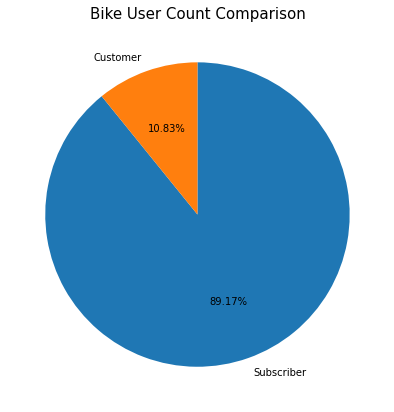

In [32]:
#show bike user type percentage
plt.figure(figsize=(10,7))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');

plt.title('Bike User Count Comparison', fontsize=15);

There are a lot more subscribers(89.17%) compared to than Customers (10.83%) which means subscribers are much more likely to use the biking system

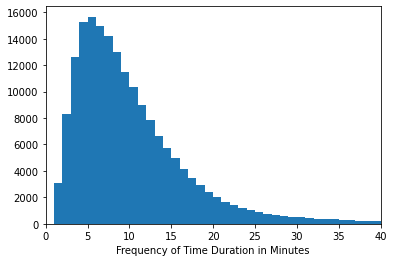

In [ ]:
bins = np.arange(0, bikes_clean['duration_in_min'].max()+1, 1)
plt.hist(data = bikes_clean, x = 'duration_in_min', bins = bins)
plt.xlim([0,40])

plt.xlabel('Frequency of Time Duration in Minutes')
plt.show();

The distribution is rightly skewed with most of the duration falling in the 5 to 10 minute mark with the maximum minutes being 40 

##What is the bike usage based on the day ?

In [15]:
bikes_clean['day'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: day, dtype: int64

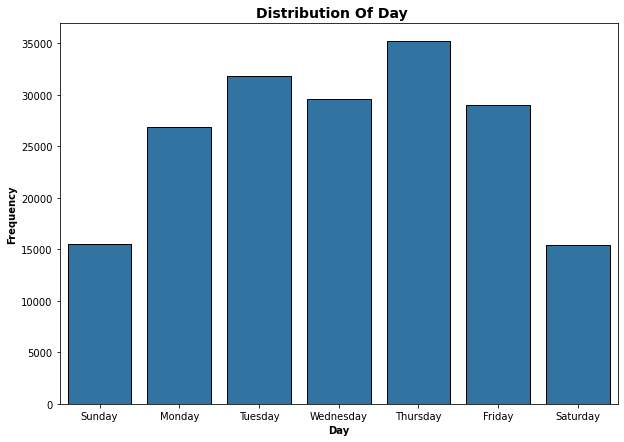

In [76]:
day_name = ["Sunday", "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

# plt.title('Daily Bike Usage')

myplot(bikes_clean,'day',order=day_name)

# sns.countplot(data=bikes_clean, x='day', order=day_name, color=base_color);

The bikes seem to mostly be used during the weekdays and less on weekends

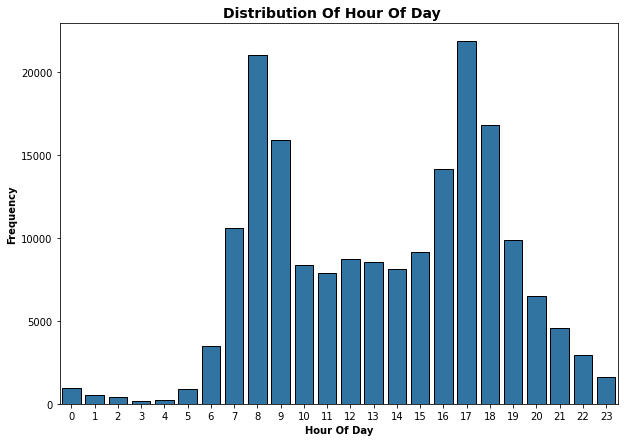

In [72]:
myplot(bikes_clean,'hour_of_day',order=hour_order)

The trips seem to be at peak hours of the day

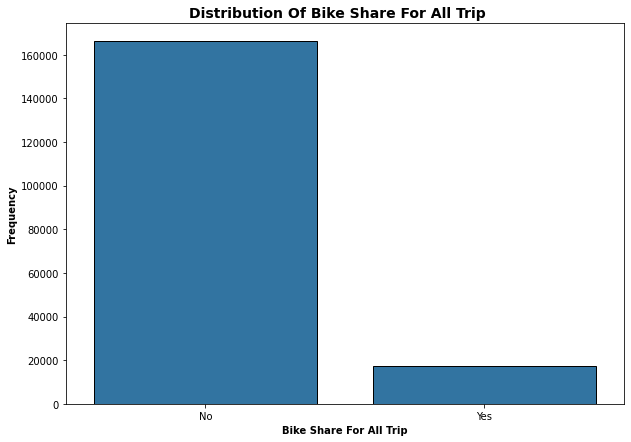

In [75]:
myplot(bikes_clean,'bike_share_for_all_trip')

Looks like Users do not often share their trips when they use the bikes

###What are the most popular/ used stations ?

In [ ]:
bikes_clean['start_station_name'].nunique()

330

There are 330 different stations that were used 

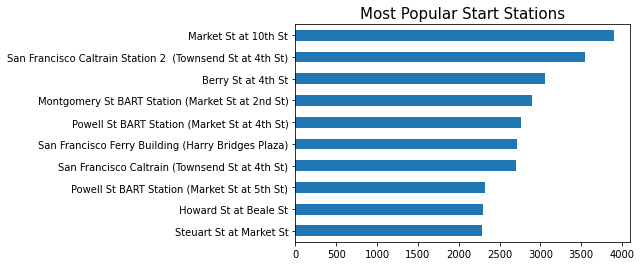

In [ ]:
plt.title('Most Popular Start Stations', fontsize=15)
bikes_clean.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

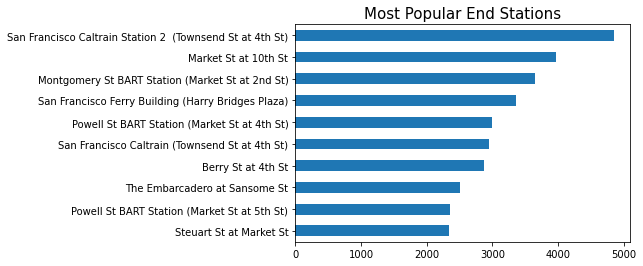

In [ ]:
plt.title('Most Popular End Stations', fontsize=15)
bikes_clean.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

From the most popular start and end stations we can also get the most popular stations in both categories 

In [ ]:
station_start = bikes_clean.start_station_name.value_counts(ascending=True).tail(10)
station_end = bikes_clean.end_station_name.value_counts(ascending=True).tail(10)
 
for station in station_start.index:
    if station in station_end:
        print(station)

Steuart St at Market St
Powell St BART Station (Market St at 5th St)
San Francisco Caltrain (Townsend St at 4th St)
San Francisco Ferry Building (Harry Bridges Plaza)
Powell St BART Station (Market St at 4th St)
Montgomery St BART Station (Market St at 2nd St)
Berry St at 4th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Market St at 10th St


##The least most popular stations

In [ ]:
rare_starts = bikes_clean.start_station_name.value_counts(ascending=True).head(10)
rare_ends = bikes_clean.end_station_name.value_counts(ascending=True).head(10)

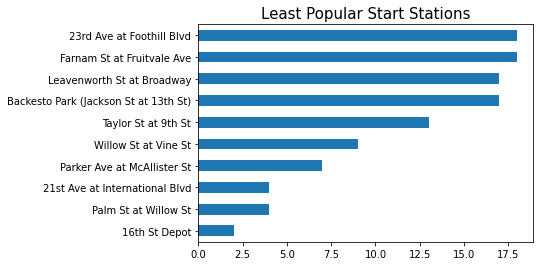

In [ ]:
plt.title('Least Popular Start Stations', fontsize=15)
rare_starts.plot.barh();

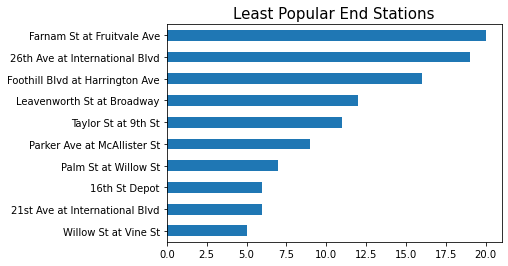

In [ ]:
plt.title('Least Popular End Stations', fontsize=15)
rare_ends.plot.barh();

In [ ]:
for station in rare_starts.index:
    if station in rare_ends:
        print(station)

16th St Depot
Palm St at Willow St
21st Ave at International Blvd
Parker Ave at McAllister St
Willow St at Vine St
Taylor St at 9th St
Leavenworth St at Broadway
Farnam St at Fruitvale Ave


###Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1.   There were some quality issues that needed to be cleaned like the conversion of datatypes
2.   Some columns were added to help with the time analysis such as the hour of the day the bikes were used and the conversion of the duration in seconds to minutes to better help in understanding the data



##Bivariate Relationship

###Average Duration Relationship between both User Types

In [ ]:
customer = bikes_clean.user_type == 'Customer'
subscribers = bikes_clean.user_type == 'Subscriber'

In [ ]:
bikes_clean[customer].duration_in_min.mean()

23.874416985437218

In [ ]:
bikes_clean[subscribers].duration_in_min.mean()

10.671061304603043

This means that the average duration in minutes for customers (23.87) is higher than that of subscibers (10.67)

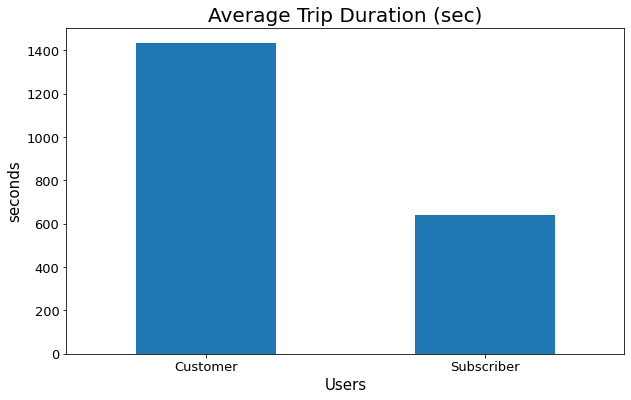

In [46]:
user_duration = bikes_clean[['user_type', 'duration_sec']].groupby('user_type').mean()

ax = user_duration.plot(kind='bar', figsize=(10,6), color=sns.color_palette()[0], fontsize=13);

locs, labels = plt.xticks()

ax.set_title("Average Trip Duration (sec)", fontsize=20)
ax.set_ylabel('seconds', fontsize=15)
ax.set_xlabel('users', fontsize=15)
plt.xticks(rotation=0)
ax.get_legend().remove() 
plt.ylabel('seconds')
plt.xlabel('Users')
# Show the plot
plt.show();

Customers spend way more time using the service than subscribers do

###Distribution per User Type

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


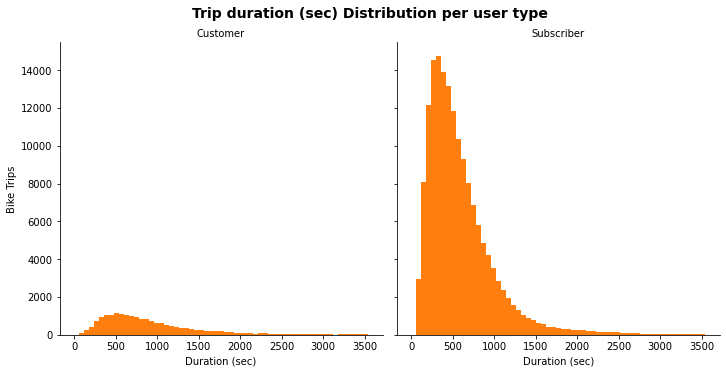

In [ ]:
g = sns.FacetGrid(bikes_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=sns.color_palette()[1], bins=bin_edges)
g.set_axis_labels("Duration (sec)", "Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) Distribution per user type', y=1.03, fontsize=14, fontweight='semibold');

They are both rightly skewed.  However, the subscribers have more of a peak and this is expected because there are a lot more subscribers than customers

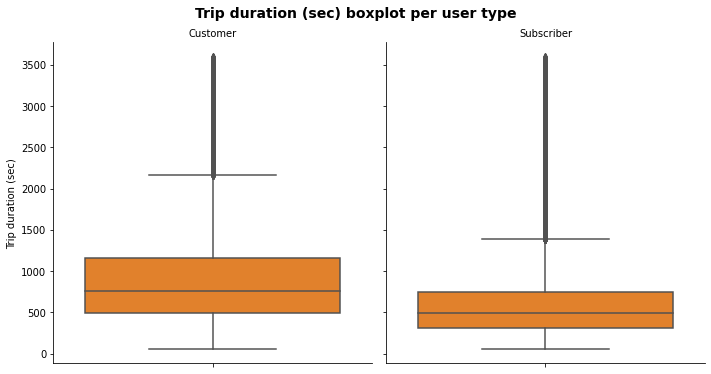

In [24]:
data = bikes_clean.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box', color = sns.color_palette()[1])
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

From the boxplot we can infer than the customers use the bikes mostly for short trips which most likely means they use the bikes for fun


###Relationship between both User Types Usage Per Day

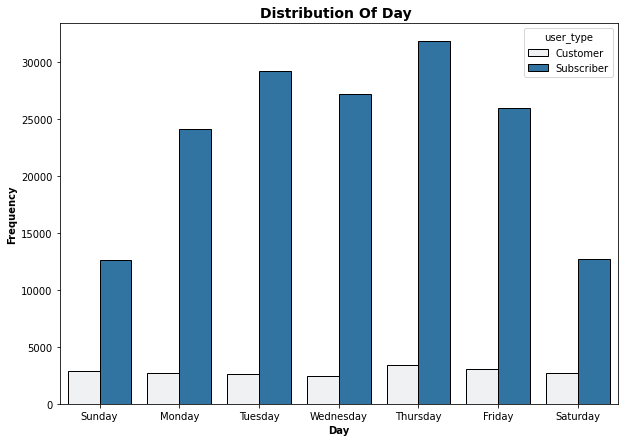

In [52]:
#To show service usage based on day of the week
myplot(bikes_clean,'day', hueVar='user_type', order=day_name)

In [53]:
# #To show service usage based on day of the week
# plt.figure(figsize=(10,6))
# plt.title('Bike Usage per Day', fontsize=15)
# chart = sns.countplot(data=bikes_clean, x='day', order=day_name, hue='user_type')
# chart.set(xlabel='Day', ylabel='')
# plt.gca().legend().set_title('');

Use of the bike service ia a lot higher on weekdays. 
Customers also saw a slight increase on Thursday while subscribers tend to not use the bike service during weekends

###Relationship between both User Types Usage Per Hour

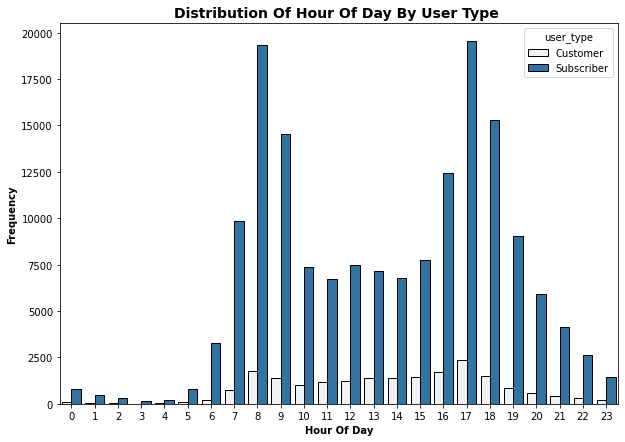

In [70]:
myplot(bikes_clean,'hour_of_day',hueVar='user_type')

In [78]:
# plt.figure(figsize=(10,6))
# plt.title('Bike Usage per Hour', fontsize=15)
# chart = sns.countplot(data=bikes_clean, x='hour_of_day', hue='user_type')
# chart.set(xlabel='Hour', ylabel='')
# plt.legend();

Subscribers tend to use the service more around the hours of 8:00 and 17:00 

###Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We find that weekends are not utlized that much for subscribers. We can also assume that customers are more likely to be using this service for short trips from the data

###Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Definitely, Both subscribers and customers have a different uses for the bikes. Subscibers are more likely to use for workday and weekday uses while customers more likely to use for fun and shorter trips

###Multivariate Relationship

###Amont of time spent per day per User Type

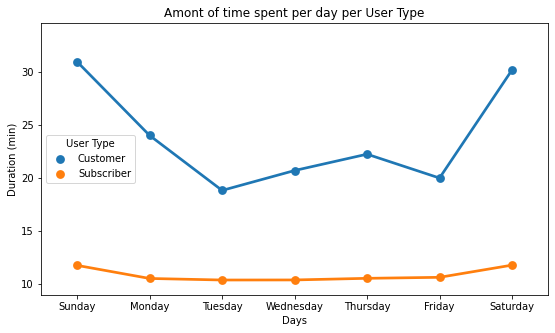

In [81]:
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
sns.pointplot(data=bikes_clean, x='day', y='duration_in_min', hue='user_type', order= day_name, errwidth=0)
plt.xlabel('Days')
plt.ylabel('Duration (min)')
plt.title('Amont of time spent per day per User Type')
plt.legend(title='User Type');

Customers would use the bikes more times on the weekends or non working days with unstable times compared to subscribers who have more stable use of the bikes during the weekdays

###Hourly Duration Usage

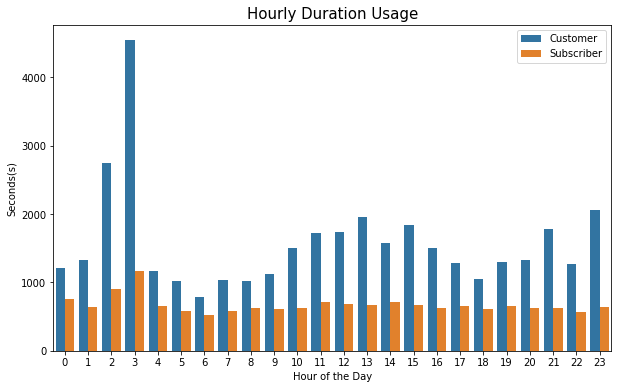

In [80]:
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
sns.barplot(data=bikes_clean, x='hour_of_day', y='duration_sec', hue='user_type', ci = None)

# chart.set(xlabel='Hour', ylabel='')

plt.ylabel('Seconds(s)')
plt.xlabel('Hour of the Day')
plt.legend();

Subscribers seem to have a lot more stable use of the bikes than the Customers although Customer usage is also high. Its interesting that Customers have a very high average duration around 3AM which is higher than every other hour

##Conclusion

##Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The Customer uses vary a lot from the subsciber uses which means the type of user has a major influence on the use of the bike service more specifically on the hour, day and duration of bike usage. Subscribers tend to use it more during weekdays while Customers have a lot more flexible time to use the service.

##Were there any interesting or surprising interactions between features?

Yes, The average usage of the bike peaked at 3AM and was mostly used by Customers